In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [62]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torchvision
from torchvision import datasets, models, transforms

import json
import numpy as np
from PIL import Image


In [63]:
vgg16 = models.vgg16(pretrained=True)
print(vgg16) # モデル構造を表示
# 学習時と推論時でモードが違う
vgg16.eval()


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [64]:
normalize = transforms.Normalize(
    mean = [0.485, 0.456, 0.406],
    std = [0.229, 0.224, 0.225])

# 256x256にリサイズし画像中心の224x224をクロップ
# テンソルに変換
# ImageNetの訓練データのmeanを引いてstdで割る(標準化)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize
])


torch.Size([3, 224, 224])
<class 'PIL.Image.Image'>


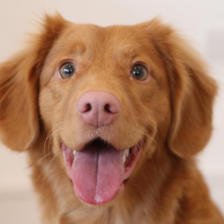

In [65]:
img = Image.open('./data/dog.jpg')
img_tensor = preprocess(img)
print(img_tensor.shape) # 画像が3次元テンソルに変換

preprocess2 = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224)
])
trans_img = preprocess2(img)
print(type(trans_img))
trans_img


In [66]:
img_tensor.unsqueeze_(0)
print(img_tensor.size())

out = vgg16(Variable(img_tensor))
print(out.size())


torch.Size([1, 3, 224, 224])
torch.Size([1, 1000])


In [67]:
'''
outはsoftmaxをとる前なので確率になっていない(足して1.0にならない)
が、分類するときは出力が最大のクラスに分類すればよい
'''
result = np.argmax(out.data.numpy())
out.topk(5)


(tensor([[14.1707, 13.6862, 13.5013, 12.3198, 11.9263]], grad_fn=<TopkBackward>),
 tensor([[211, 207, 215, 209, 208]]))

In [68]:
class_index = json.load(open('./aidaiary/imagenet_class_index.json', 'r'))
print(class_index)


{'0': ['n01440764', 'tench'], '1': ['n01443537', 'goldfish'], '2': ['n01484850', 'great_white_shark'], '3': ['n01491361', 'tiger_shark'], '4': ['n01494475', 'hammerhead'], '5': ['n01496331', 'electric_ray'], '6': ['n01498041', 'stingray'], '7': ['n01514668', 'cock'], '8': ['n01514859', 'hen'], '9': ['n01518878', 'ostrich'], '10': ['n01530575', 'brambling'], '11': ['n01531178', 'goldfinch'], '12': ['n01532829', 'house_finch'], '13': ['n01534433', 'junco'], '14': ['n01537544', 'indigo_bunting'], '15': ['n01558993', 'robin'], '16': ['n01560419', 'bulbul'], '17': ['n01580077', 'jay'], '18': ['n01582220', 'magpie'], '19': ['n01592084', 'chickadee'], '20': ['n01601694', 'water_ouzel'], '21': ['n01608432', 'kite'], '22': ['n01614925', 'bald_eagle'], '23': ['n01616318', 'vulture'], '24': ['n01622779', 'great_grey_owl'], '25': ['n01629819', 'European_fire_salamander'], '26': ['n01630670', 'common_newt'], '27': ['n01631663', 'eft'], '28': ['n01632458', 'spotted_salamander'], '29': ['n01632777', 

In [69]:
labels = {int(key):value for(key, value) in class_index.items()}
print(labels[0])
print(labels[1])

print(labels[result])


['n01440764', 'tench']
['n01443537', 'goldfish']
['n02100583', 'vizsla']


['n02100583', 'vizsla'] 0.36786616


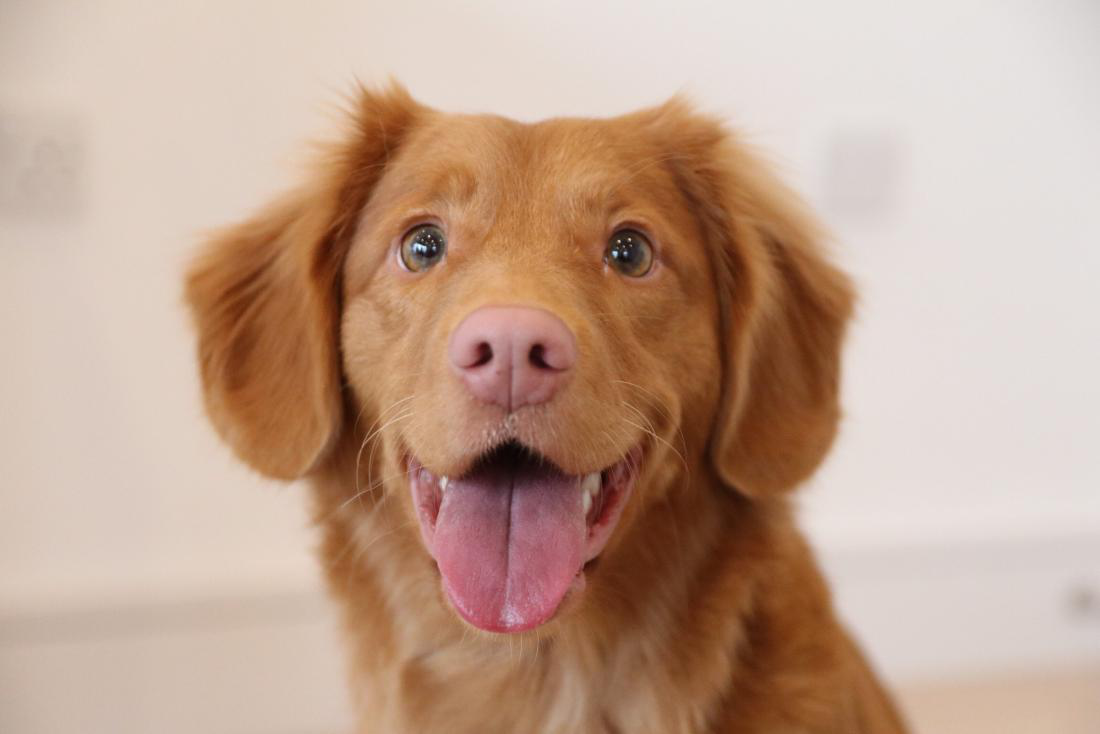

In [70]:
def predict(image_file):
    img = Image.open(image_file)
    img_tensor = preprocess(img)
    img_tensor.unsqueeze_(0)
    
    out = vgg16(Variable(img_tensor))

    # 出力を確立にする
    out = nn.functional.softmax(out, dim=1)
    out = out.data.numpy()

    maxid = np.argmax(out)
    maxprob = np.max(out)
    label =labels[maxid]
    return img, label, maxprob

img, label, prob = predict('./data/dog.jpg')
print(label, prob)
img


